In [10]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from sklearn.model_selection import GridSearchCV
from keras.layers import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta
from sklearn.model_selection import train_test_split
import numpy as np
import random
import os
import sys
import cv2
from keras.utils import to_categorical
import matplotlib
from subprocess import check_output

In [12]:
def classes_to_int(label):
    # label = classes.index(dir)
    label = label.strip()
    if label == "Black-grass":  return 0
    if label == "Charlock":  return 1
    if label == "Cleavers":  return 2
    if label == "Common Chickweed":  return 3
    if label == "Common wheat":  return 4
    if label == "Fat Hen":  return 5
    if label == "Loose Silky-bent": return 6
    if label == "Maize":  return 7
    if label == "Scentless Mayweed": return 8
    if label == "Shepherds Purse": return 9
    if label == "Small-flowered Cranesbill": return 10
    if label == "Sugar beet": return 11
    print("Invalid Label", label)
    return 12

In [13]:
def int_to_classes(i):
    if i == 0: return "Black-grass"
    elif i == 1: return "Charlock"
    elif i == 2: return "Cleavers"
    elif i == 3: return "Common Chickweed"
    elif i == 4: return "Common wheat"
    elif i == 5: return "Fat Hen"
    elif i == 6: return "Loose Silky-bent"
    elif i == 7: return "Maize"
    elif i == 8: return "Scentless Mayweed"
    elif i == 9: return "Shepherds Purse"
    elif i == 10: return "Small-flowered Cranesbill"
    elif i == 11: return "Sugar beet"
    print("Invalid class ", i)
    return "Invalid Class"

In [14]:
#1.Read the images and generate the train and test dataset (5 points)
NUM_CLASSES = 12
# we need images of same size so we convert them into the size
WIDTH = 128
HEIGHT = 128
DEPTH = 3
inputShape = (WIDTH, HEIGHT, DEPTH)
# initialize number of epochs to train for, initial learning rate and batch size
EPOCHS = 25
INIT_LR = 1e-3
BS = 32

def readTrainData(trainDir):
    data = []
    labels = []
    # loop over the input images
    dirs = os.listdir(trainDir) 
    for dir in dirs:
        absDirPath = os.path.join(os.path.sep,trainDir, dir)
        images = os.listdir(absDirPath)
        for imageFileName in images:
            # load the image, pre-process it, and store it in the data list
            imageFullPath = os.path.join(trainDir, dir, imageFileName)
            #print(imageFullPath)
            img = load_img(imageFullPath)
            arr = img_to_array(img)  # Numpy array with shape (233,233,3)
            arr = cv2.resize(arr, (HEIGHT,WIDTH)) #Numpy array with shape (HEIGHT, WIDTH,3)
            #print(arr.shape) 
            data.append(arr)
            label = classes_to_int(dir)
            labels.append(label)
    return data, labels


In [15]:
def createModel():
    model = Sequential()
    # first set of CONV => RELU => POOL layers
    # The CONV  layer will learn 20 convolution filters, each of which are 5×5.
    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    #model.add(BatchNormalization()) 
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # second set of CONV => RELU => POOL layers
    model.add(Conv2D(64, (3,3), padding="same"))
    #model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(128, (3,3), padding="same"))
    #model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=500))
    model.add(Activation("relu"))
    model.add(Dense(units=12))
    model.add(Activation("softmax"))
    opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
    # use binary_crossentropy if there are two classes
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model

In [16]:
#2.Divide the data set into Train and validation data sets
random.seed(10)
allLabels =  os.listdir("C:\\Users\\shivaramakrishna\\Desktop\\updated project\\train\\train")  # list of subdirectories and files
print("Loading images...")
sys.stdout.flush()
X, Y = readTrainData("C:\\Users\\shivaramakrishna\\Desktop\\updated project\\train\\train")
# scale the raw pixel intensities to the range [0, 1]
X = np.array(X, dtype="float") / 255.0
Y = np.array(Y)
# convert the labels from integers to vectors
Y =  to_categorical(Y, num_classes=12)

print("Parttition data into 75:25...")
sys.stdout.flush()
# partition the data into training and testing splits using 75% training and 25% for validation
(trainX, valX, trainY, valY) = train_test_split(X,Y,test_size=0.25, random_state=10)

Loading images...
Parttition data into 75:25...


In [17]:
#3. Initialize & build the model (10 points)
#construct the image generator for data augmentation
print("Generating images...")
sys.stdout.flush()
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, \
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,\
    horizontal_flip=True, fill_mode="nearest")
# initialize the model
print("compiling model...")
sys.stdout.flush()
model = createModel()
# train the network
print("training network...")
sys.stdout.flush()
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS), \
    validation_data=(valX, valY), \
    steps_per_epoch=len(trainX) // BS, epochs=10, verbose=1)

# save the model to disk
print("Saving model to disk")
sys.stdout.flush()
model.save("C:\\Users\\shivaramakrishna\\Desktop\\updated project\\model.h5")

Generating images...
compiling model...
training network...
Epoch 1/10
241/241 [==============================] - 121s 502ms/step - loss: 1.6936 - acc: 0.4030 - val_loss: 1.2059 - val_acc: 0.5981
Epoch 2/10
241/241 [==============================] - 121s 503ms/step - loss: 1.1548 - acc: 0.6030 - val_loss: 0.8810 - val_acc: 0.7049
Epoch 3/10
241/241 [==============================] - 123s 509ms/step - loss: 0.9069 - acc: 0.6912 - val_loss: 0.7901 - val_acc: 0.7282
Epoch 4/10
241/241 [==============================] - 121s 500ms/step - loss: 0.7304 - acc: 0.7469 - val_loss: 0.6857 - val_acc: 0.7911
Epoch 5/10
241/241 [==============================] - 118s 491ms/step - loss: 0.6345 - acc: 0.7870 - val_loss: 0.4722 - val_acc: 0.8536
Epoch 6/10
241/241 [==============================] - 120s 497ms/step - loss: 0.5324 - acc: 0.8132 - val_loss: 0.4674 - val_acc: 0.8478
Epoch 7/10
241/241 [==============================] - 118s 489ms/step - loss: 0.4898 - acc: 0.8233 - val_loss: 0.4286 - val_

In [5]:
# read test data and find its classification
import os
from math import modf


from keras.models import load_model
mymodel = load_model('C:\\Users\\shivaramakrishna\\Desktop\\updated project\\model.h5')






In [21]:
print(H.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


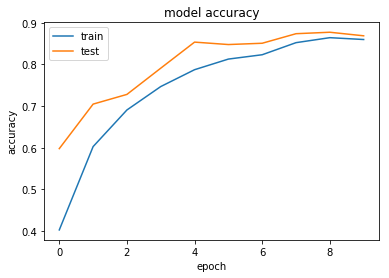

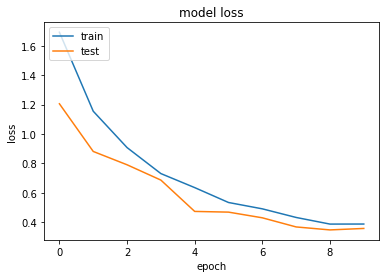

In [27]:
import matplotlib.pyplot as plt
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()